In [86]:
import subprocess
import sys
import os
from IPython.display import clear_output

In [88]:
times = {
    0:[],
    1:[]
}

for val in [0,1]:
    os.environ["PYTHONGIL"] = str(val)
    for threads in range(1,51):
        clear_output(wait=True)
        if val == 0:
            print("NoGil is active")
        else:
            print("NoGil is not active")
        print("Threads:", threads)
        output = subprocess.check_output(f"python fib.py {threads}", shell=True)
        tm = float(output.decode(sys.stdout.encoding).replace('\n',''))
        times[val].append(tm)


NoGil is not active
Threads: 50


In [89]:
times

{0: [0.94,
  0.927,
  0.952,
  1.435,
  1.66,
  2.054,
  2.279,
  2.074,
  2.394,
  2.547,
  2.814,
  3.344,
  3.309,
  3.675,
  3.772,
  4.018,
  4.365,
  4.582,
  4.947,
  5.135,
  5.327,
  5.562,
  7.158,
  7.067,
  6.834,
  7.052,
  6.387,
  6.634,
  8.768,
  8.15,
  8.411,
  8.585,
  8.826,
  9.065,
  9.919,
  9.621,
  9.844,
  10.101,
  10.608,
  10.66,
  10.918,
  11.19,
  12.556,
  11.616,
  12.917,
  11.913,
  11.564,
  12.368,
  12.89,
  13.291],
 1: [1.177,
  1.93,
  2.887,
  3.776,
  4.779,
  5.627,
  6.553,
  7.535,
  8.487,
  9.454,
  10.378,
  11.352,
  12.498,
  13.173,
  14.149,
  15.104,
  15.901,
  16.931,
  17.777,
  18.706,
  19.778,
  20.858,
  21.541,
  22.451,
  23.598,
  25.045,
  25.425,
  26.095,
  26.993,
  28.269,
  29.068,
  29.918,
  31.138,
  32.251,
  32.95,
  35.794,
  34.524,
  35.467,
  36.289,
  37.224,
  38.387,
  39.331,
  40.2,
  41.356,
  41.866,
  42.765,
  43.799,
  44.981,
  45.993,
  46.96]}

In [90]:
import matplotlib.pyplot as plt
import matplotlib

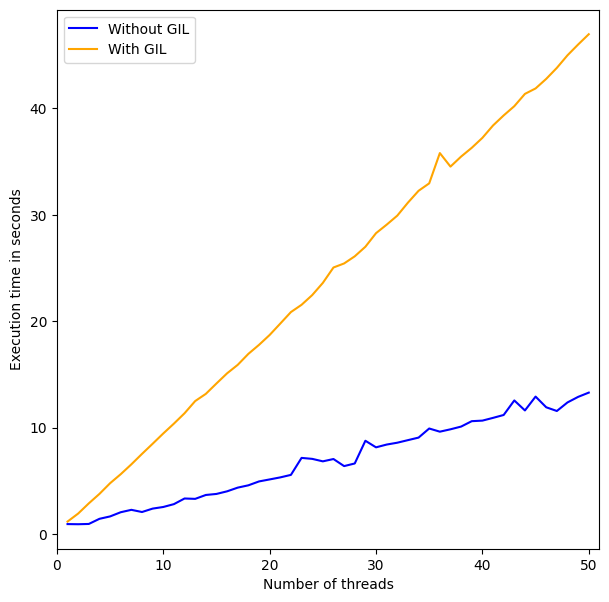

In [92]:
plt.figure(figsize=(7,7))
plt.plot(list(range(1,51)), times[0], color="blue")
plt.plot(list(range(1,51)), times[1], color="orange")
plt.xlabel("Number of threads")
plt.ylabel("Execution time in seconds")
plt.legend(["Without GIL","With GIL"])
plt.xlim((0,51))
plt.show()